Using https://github.com/patrickloeber/pytorchTutorial/blob/master/14_cnn.py. 

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

Files already downloaded and verified
Files already downloaded and verified


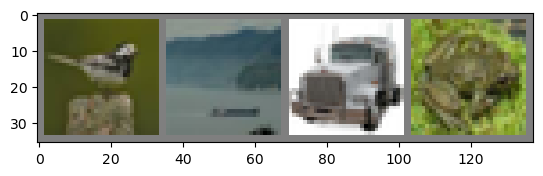

In [27]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters 
num_epochs = 10
batch_size = 4
learning_rate = 0.001

# Transforming to tensors, normalizing range to [-1. 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./datasets', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./datasets/', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Fetch random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [28]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images) # Forward pass
        loss = criterion(outputs, labels)

        optimizer.zero_grad() # Backpropogation
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')

with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)  # Max returns (value ,index)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')

Epoch [1/10], Step [2000/12500], Loss: 2.2903
Epoch [1/10], Step [4000/12500], Loss: 2.3254
Epoch [1/10], Step [6000/12500], Loss: 2.3095
Epoch [1/10], Step [8000/12500], Loss: 2.2875
Epoch [1/10], Step [10000/12500], Loss: 2.3081
Epoch [1/10], Step [12000/12500], Loss: 2.3289
Epoch [2/10], Step [2000/12500], Loss: 2.2259
Epoch [2/10], Step [4000/12500], Loss: 2.0789
Epoch [2/10], Step [6000/12500], Loss: 1.9824
Epoch [2/10], Step [8000/12500], Loss: 1.8291
Epoch [2/10], Step [10000/12500], Loss: 1.8886
Epoch [2/10], Step [12000/12500], Loss: 1.7772
Epoch [3/10], Step [2000/12500], Loss: 1.7819
Epoch [3/10], Step [4000/12500], Loss: 1.6139
Epoch [3/10], Step [6000/12500], Loss: 1.2234
Epoch [3/10], Step [8000/12500], Loss: 1.5334
Epoch [3/10], Step [10000/12500], Loss: 1.8871
Epoch [3/10], Step [12000/12500], Loss: 1.9612
Epoch [4/10], Step [2000/12500], Loss: 1.3853
Epoch [4/10], Step [4000/12500], Loss: 1.8403
Epoch [4/10], Step [6000/12500], Loss: 1.0441
Epoch [4/10], Step [8000/125

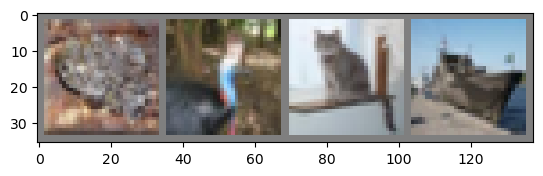

In [24]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))